In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import info

In [65]:
# EVALUATION PLOTS

path = '../results/foraging/evaluation/'
dumb_df = pd.read_csv(path+'eval_dumb.tsv', sep='\t')
obs_3_df = pd.read_csv(path+'eval_model_andi.tsv', sep='\t')
obs_5_df = pd.read_csv(path+'eval_model_seb.tsv', sep='\t')

In [66]:
# rename index col
dumb_df = dumb_df.rename(columns={'Unnamed: 0': 'index'})
obs_3_df = obs_3_df.rename(columns={'Unnamed: 0': 'index'})
obs_5_df = obs_5_df.rename(columns={'Unnamed: 0': 'index'})
dumb_df.tail()

,index,action_index,episode_index,time_elapsed
45,45,0.0,45.0,2848000.0
46,46,0.0,46.0,2915000.0
47,47,0.0,47.0,2980000.0
48,48,0.0,48.0,3055500.0
49,49,0.0,49.0,3142500.0


In [76]:
# remove row with outlier(s)
# obs_5_df.drop(index=[21,43,44], inplace=True)
obs_3_df.count()

index            50
action_index     50
episode_index    50
time_elapsed     50
dtype: int64

In [71]:
_df = pd.DataFrame()
prev_v = 0
for k,v in enumerate(dumb_df['time_elapsed']):
    value = dumb_df.iloc[k]['time_elapsed'] - prev_v
    _df = _df.append({"time_elapsed": value}, ignore_index=True)
    prev_v = dumb_df.iloc[k]['time_elapsed']

dumb_df['time_elapsed'] = _df['time_elapsed']
# dumb_df['time_elapsed']

0      51000.0
1      76500.0
2      42500.0
3      58000.0
4      73000.0
5      71500.0
6      66000.0
7      45000.0
8      49000.0
9      82000.0
10     84500.0
11     93500.0
12     86000.0
13     66500.0
14     95000.0
15     55500.0
16     53500.0
17     29000.0
18     93000.0
19     36500.0
20     66000.0
21     90000.0
22     64500.0
23     39000.0
24     54000.0
25    106500.0
26     38500.0
27    119000.0
28     42000.0
29     27500.0
30     53000.0
31     31500.0
32     35500.0
33     98500.0
34     61500.0
35     58500.0
36     52500.0
37     73000.0
38     34500.0
39     75000.0
40     55500.0
41     54500.0
42     44000.0
43     51500.0
44     71000.0
45     43500.0
46     67000.0
47     65000.0
48     75500.0
49     87000.0
Name: time_elapsed, dtype: float64

In [72]:
_df = pd.DataFrame({'index': dumb_df['index'], 'hardcoded': dumb_df['time_elapsed'], '3_obs_model': obs_3_df['time_passed'], '5_obs_model': obs_5_df['time_passed']})

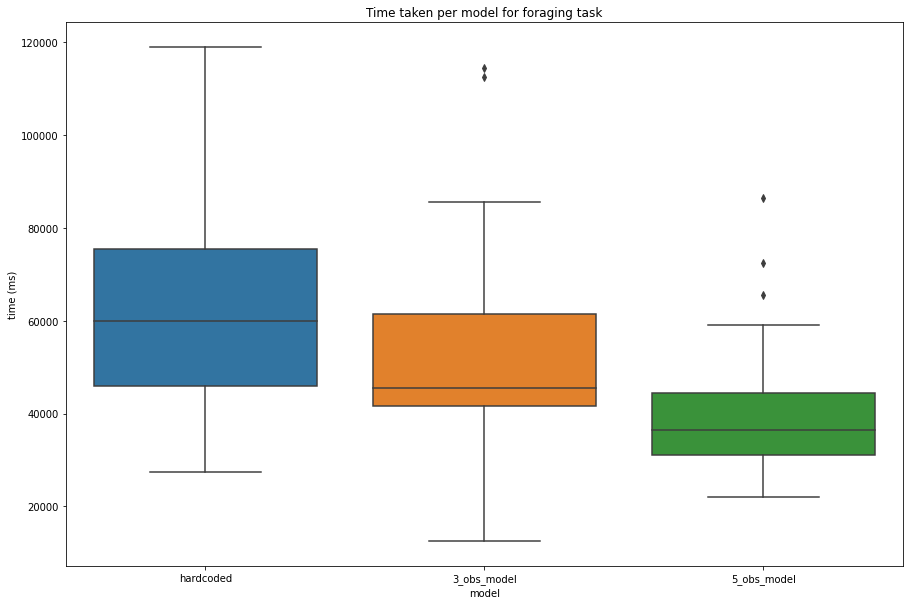

In [73]:

# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='index', value_vars=['hardcoded', '3_obs_model', '5_obs_model'])
sns.boxplot(data=melt, x='variable', y='value')
plt.xlabel('model')
plt.ylabel('time (ms)')
plt.title('Time taken per model for foraging task')
plt.savefig('../img/task_2/eval_boxplot.png')

In [37]:
# LEARNING PLOTS

path = '../results/foraging/'
obs_3_df = pd.read_csv(path+'andi/final_model/learning_progress.tsv', sep='\t')
obs_5_df = pd.read_csv(path+'seb/final_model/learning_progress.tsv', sep='\t')

In [46]:
# rename index col
obs_3_df = obs_3_df.rename(columns={'Unnamed: 0': 'index'})
obs_5_df = obs_5_df.rename(columns={'Unnamed: 0': 'index'})

obs_5_df.count()

index                59
accu_reward          59
avg_food_distance    59
time_passed          59
dtype: int64

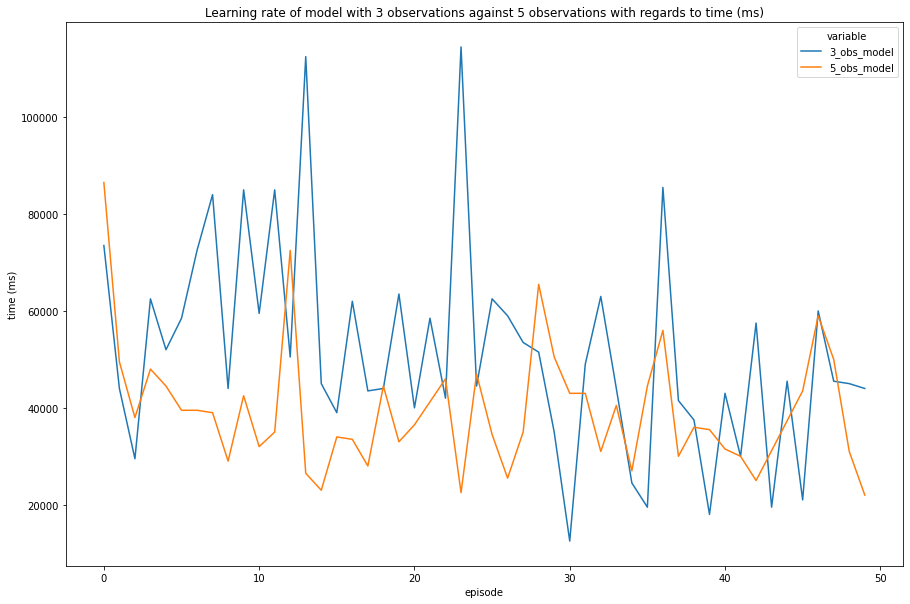

In [48]:

# group per episode and append to new df
# _df = pd.DataFrame()
# for k,v in df.groupby('episode_index'):
#     _df = _df.append({'episode_index': int(k), 'reward': v['reward'].sum(), 'v_measure_sensor_distance': v['v_measure_sensor_distance'].sum(), 'epsilon': v['epsilon'].min()}, ignore_index=True)
#     print(v['reward'].sum())

    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='index', value_vars=['3_obs_model', '5_obs_model'])
sns.lineplot(data=melt, x='index', y='value', hue='variable')
plt.xlabel('episode')
plt.ylabel('time (ms)')
plt.title('Learning rate of model with 3 observations against 5 observations with regards to time (ms)')
plt.savefig('../img/task_2_learning_lineplot.png')